# Bankruptcy Prediction

**Abount Data Set:<br>**
The dataset is about bankruptcy prediction of Polish companies. The data was collected from Emerging Markets Information Service (EMIS, [Web Link]), which is a database containing information on emerging markets around the world. The bankrupt companies were analysed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.
Basing on the collected data five classification cases were distinguished, that depends on the forecasting period:
- 1stYear the data contains financial rates from 1st year of the forecasting period and corresponding class label that indicates bankruptcy status after 5 years. The data contains 7027 instances (financial statements), 271 represents bankrupted companies, 6756 firms that did not bankrupt in the forecasting period.
- 2ndYear  the data contains financial rates from 2nd year of the forecasting period and corresponding class label that indicates bankruptcy status after 4 years. The data contains 10173 instances (financial statements), 400 represents bankrupted companies, 9773 firms that did not bankrupt in the forecasting period.
- 3rdYear  the data contains financial rates from 3rd year of the forecasting period and corresponding class label that indicates bankruptcy status after 3 years. The data contains 10503 instances (financial statements), 495 represents bankrupted companies, 10008 firms that did not bankrupt in the forecasting period.
- 4thYear the data contains financial rates from 4th year of the forecasting period and corresponding class label that indicates bankruptcy status after 2 years. The data contains 9792 instances (financial statements), 515 represents bankrupted companies, 9277 firms that did not bankrupt in the forecasting period.
- 5thYear  the data contains financial rates from 5th year of the forecasting period and corresponding class label that indicates bankruptcy status after 1 year. The data contains 5910 instances (financial statements), 410 represents bankrupted companies, 5500 firms that did not bankrupt in the forecasting period.

**Attribute Information:<br>**
- X1: net profit / total assets
- X2: total liabilities / total assets
- X3: working capital / total assets
- X4: current assets / short-term liabilities
- X5: [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
- X6: retained earnings / total assets
- X7: EBIT / total assets
- X8: book value of equity / total liabilities
- X9: sales / total assets
- X10: equity / total assets
- X11: (gross profit + extraordinary items + financial expenses) / total assets
- X12: gross profit / short-term liabilities
- X13: (gross profit + depreciation) / sales
- X14: (gross profit + interest) / total assets
- X15: (total liabilities * 365) / (gross profit + depreciation)
- X16: (gross profit + depreciation) / total liabilities
- X17: total assets / total liabilities
- X18: gross profit / total assets
- X19: gross profit / sales
- X20: (inventory * 365) / sales
- X21: sales (n) / sales (n-1)
- X22: profit on operating activities / total assets
- X23: net profit / sales
- X24: gross profit (in 3 years) / total assets
- X25: (equity - share capital) / total assets
- X26: (net profit + depreciation) / total liabilities
- X27: profit on operating activities / financial expenses
- X28: working capital / fixed assets
- X29: logarithm of total assets
- X30: (total liabilities - cash) / sales
- X31: (gross profit + interest) / sales
- X32: (current liabilities * 365) / cost of products sold
- X33: operating expenses / short-term liabilities
- X34: operating expenses / total liabilities
- X35: profit on sales / total assets
- X36: total sales / total assets
- X37: (current assets - inventories) / long-term liabilities
- X38: constant capital / total assets
- X39: profit on sales / sales
- X40: (current assets - inventory - receivables) / short-term liabilities
- X41: total liabilities / ((profit on operating activities + depreciation) * (12/365))
- X42: profit on operating activities / sales
- X43: rotation receivables + inventory turnover in days
- X44: (receivables * 365) / sales
- X45: net profit / inventory
- X46: (current assets - inventory) / short-term liabilities
- X47: (inventory * 365) / cost of products sold
- X48: EBITDA (profit on operating activities - depreciation) / total assets
- X49: EBITDA (profit on operating activities - depreciation) / sales
- X50: current assets / total liabilities
- X51: short-term liabilities / total assets
- X52: (short-term liabilities * 365) / cost of products sold)
- X53: equity / fixed assets
- X54: constant capital / fixed assets
- X55: working capital
- X56: (sales - cost of products sold) / sales
- X57: (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)
- X58: total costs /total sales
- X59: long-term liabilities / equity
- X60: sales / inventory
- X61: sales / receivables
- X62: (short-term liabilities *365) / sales
- X63: sales / short-term liabilities
- X64: sales / fixed assets
- Class(Target): - 0 did not get bankrupt/ 1 - got bankrupt


**Problem Statement:<br>** 
You have to build a model on the basis given features and target column to predict whether a bank is going to get bankrupt for a given set of features.


In [1]:
#Loading libraries 

# for numeric data manupulation
import numpy as np 
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for stats and os 
from scipy import stats
import os

# to suppress unwanted warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# customizing notebook
# path = '/content/drive/My Drive/Datasets/ML-1/Bankruptcy dataset'
path = r'F:\Python\Python\IPython\ML-1\Bankruptcy dataset'
os.chdir(path)

pd.set_option("display.precision",8)
pd.set_option("display.max_columns",None)
np.set_printoptions(precision=8,suppress=False)

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
sns.set(style='ticks', palette='muted',font_scale=1.3)
# sns.set(font_scale=1.3)

In [3]:
# loading helper libraries
import glob
from collections import Counter
from itertools import combinations
# loading ml libraries
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import PowerTransformer,QuantileTransformer
from sklearn.pipeline import make_pipeline

In [4]:
# loading dataset
data = pd.concat([pd.read_csv(file) for file in glob.glob('*.csv')])

print(f'No. of rows in dataset    : {data.shape[0]} \nNo. of columns in dataset : {data.shape[1]}')

data.head()

No. of rows in dataset    : 42627 
No. of columns in dataset : 65


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,0.24976,0.6598,0.1666,0.24976,497.42,0.73378,2.6349,0.24976,0.14942,43.37,1.2479,0.21402,0.11998,0.47706,0.50494,0.60411,1.4582,1.7615,5.9443,0.11788,0.14942,94.14,3.8772,0.56393,0.21402,1.741,593.27,0.50591,0.12804,0.66295,0.051402,0.12804,114.42,71.05,1.0097,1.5225,49.394,0.1853,0.11085,2.042,0.37854,0.25792,2.2437,2.248,348690,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,0.26114,0.5168,0.15835,0.25834,677.96,0.53838,2.0005,0.25834,0.152,87.981,1.4293,0.24806,0.12304,?,0.39542,0.43992,88.444,16.946,3.6884,0.26969,0.152,122.17,2.9876,2.9876,0.20616,1.6996,?,0.49788,0.1213,0.086422,0.064371,0.14595,199.49,111.51,0.51045,1.1252,100.13,0.23727,0.13961,1.9447,0.49988,0.33472,17.866,17.866,2304.6,0.1213,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,0.31258,0.64184,0.24435,0.30906,794.16,0.45961,1.4369,0.30906,0.2361,73.133,1.4283,0.3026,0.18996,?,0.28932,0.37282,86.011,1.0627,4.3749,0.41929,0.23815,176.93,2.063,1.4274,0.31565,1.309,2.3019,0.51537,0.24114,0.32202,0.07402,0.23117,165.51,92.381,0.94807,1.0101,96.372,0.29181,0.22293,1.0758,0.48152,0.48474,1.2098,2.0504,6332.7,0.24114,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,0.092704,0.30163,0.094257,0.092704,917.01,0.39803,3.2537,0.092704,0.071428,79.788,1.5069,0.1155,0.062782,0.17193,0.57353,0.36152,0.94076,1.9618,4.6511,0.14343,0.071428,91.37,3.9948,0.37581,0.1155,1.3562,?,0.57353,0.088995,0.40139,0.069622,0.088995,180.77,100.98,0.2872,1.5696,84.344,0.085874,0.066165,2.4928,0.30734,0.25033,2.4524,2.4524,20545,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,0.18732,0.33147,0.12182,0.18732,1133.2,0.32211,1.6307,0.18732,0.11553,57.045,?,0.19832,0.11553,0.18732,0.38677,0.32211,1.4138,1.1184,4.1424,0.27884,0.11553,147.04,2.4823,0.3234,0.19832,1.6278,11.247,0.43489,0.12231,0.29304,0.09668,0.12231,141.62,84.574,0.73919,0.95787,65.936,0.18811,0.11601,1.2959,0.56511,0.40285,1.8839,2.1184,3186.6,0.13485,0.48431,0.86515,0.12444,6.3985,4.3158,127.21,2.8692,7.898,0


In [5]:
# checking for duplicate rows in dataset
print(f'No. of duplicate rows found if any: {data.duplicated().sum()}')

data[data.duplicated()]

No. of duplicate rows found if any: 370


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
118,0.099179,0.58044,0.2547,1.4388,-10.676,0.099179,0.12489,0.72283,1.0865,0.41956,0.12489,0.21517,0.098878,0.12489,1387,0.26315,1.7228,0.12489,0.080848,34.628,?,0.12201,0.064204,0.12489,0.41956,0.21885,0.85811,1.545,4.1092,0.29347,0.080848,149.01,2.4495,0.2102,0.12201,1.5494,?,0.41956,0.078981,0.47652,0.12734,0.078981,131.98,97.349,0.67675,1.1863,37.622,0.094155,0.060951,1.4388,0.58044,0.40824,2.545,2.545,3275.2,0.079592,0.23639,0.92041,0,10.541,3.7494,137.15,2.6614,9.3703,0
357,0.15175,0.64951,-0.022479,0.96434,-35.979,0.19404,0.18937,0.49455,1.1202,0.32121,0.18937,0.3004,0.12411,0.18937,1054.1,0.34628,1.5396,0.18937,0.1045,26.946,2.3085,0.19312,0.08374,0.24091,0.32121,0.28836,1.1938,-0.057334,5.3698,0.34914,0.1045,142.24,2.5661,0.29734,0.19312,1.829,24.826,0.34031,0.10657,0.029599,0.093386,0.10657,118.69,91.741,1.1343,0.75212,30.186,0.15758,0.086957,0.93599,0.63041,0.3897,0.81928,0.86799,-5267,0.10733,0.47244,0.89267,0.059458,13.546,3.9786,126.97,2.8746,4.6221,0
558,0.081602,0.15844,0.16572,2.369,-3.4458,0.137,0.11212,5.3114,1.0312,0.84156,0.11981,0.92619,0.21846,0.11212,256.72,1.4218,6.3114,0.11212,0.10873,43.847,?,0.11354,0.079135,0.11212,0.137,1.2292,14.751,0.23234,5.4579,0.15365,0.10873,58.551,6.6528,5.0827,0.27656,1.0312,4.3563,0.87895,0.2682,0.39638,0.023297,0.11011,84.521,40.674,0.65875,1.3457,56.144,0.000383,0.000372,1.8099,0.12105,0.15031,1.1799,1.2323,2.369,0.2682,0,0.77112,0.044433,8.3245,8.9737,42.848,8.5186,1.4458,0
1113,0.10847,0.70428,0.27741,1.3939,13.1,0.27283,0.13401,0.41675,1.0244,0.29351,0.13401,0.19028,0.03026,0.13401,1889.3,0.19319,1.4199,0.13401,0.029804,9.3592,1.0906,0.092235,0.024123,0.3378,0.29351,0.15693,0.21013,15.15,4.5371,0.14413,0.029804,58.562,6.2327,0.13096,0.092235,4.5459,?,0.29351,0.020513,0.083273,0.24558,0.020513,74.928,65.568,0.94078,1.2302,9.5872,0.090185,0.020057,1.3939,0.70428,0.16044,16.029,16.029,9555.8,0.023781,0.36956,0.97622,0,38.999,5.5667,57.17,6.3845,245.56,0
1199,0.21606,0.071064,0.44849,7.3111,49.824,0.51558,0.26765,13.018,1.1431,0.92512,0.26765,3.7663,0.13227,0.26765,85.768,4.2557,14.072,0.26765,0.11706,23.552,1.2301,0.26575,0.094496,0.63959,0.92512,3.5297,1.3286,0.93349,4.5557,-0.016475,0.11706,12.968,28.146,3.7396,0.26575,2.2947,?,0.92512,0.11623,1.9374,0.007774,0.11623,60.961,37.409,1.4645,5.235,26.923,0.23098,0.10102,7.3111,0.071064,0.035528,1.9256,1.9256,16124,0.1252,0.23355,0.8748,0,15.498,9.7569,11.344,32.175,4.7591,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4154,0.039711,0.56299,0.063264,1.1591,-28.718,0.060346,0.049546,0.47863,1.0506,0.26947,0.049546,0.12462,0.055073,0.049546,2332.9,0.15646,1.7762,0.049546,0.030978,39.817,1.2719,0.073154,0.024829,0.073464,0.26947,0.13899,0.48053,0.11734,4.3993,0.34381,0.030978,95.324,3.8291,0.12994,0.073154,1.6374,1.7313,0.43488,0.045739,0.050954,0.16572,0.045739,100.55,60.729,0.2276,0.72028,41.832,0.034616,0.021643,0.81857,0.39758,0.26116,0.49979,0.80659,1586.6,0.048167,0.14737,0.95183,0.61385,9.1668,6.0103,90.732,4.0228,2.9665,0
4162,0.040497,0.65836,0.12973,1.1971,7.6665,0,0.040497,0.51893,2.4356,0.34164,0.072732,0.061534,0.023507,0.040497,4197.1,0.086964,1.5189,0.040497,0.016627,11.175,1.2136,0.044058,0.016627,-0.19375,0.31497,0.086964,1.3667,0.61152,3.6153,0.26713,0.029863,106.25,3.4352,3.434,0.17477,2.4356,?,0.34164,0.071758,0.02299,0.36085,0.018089,115.8,104.63,0.5430

In [6]:
# dropping duplicate records from dataset
data.drop_duplicates(inplace=True)
# resetting index after droping duplicate records
data.index = range(len(data))

print(f'After Deletion: \n{"*"*15} \nNo. of rows in dataset    : {data.shape[0]} \nNo. of columns in dataset : {data.shape[1]}')
data.head()

After Deletion: 
*************** 
No. of rows in dataset    : 42257 
No. of columns in dataset : 65


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,0.24976,0.6598,0.1666,0.24976,497.42,0.73378,2.6349,0.24976,0.14942,43.37,1.2479,0.21402,0.11998,0.47706,0.50494,0.60411,1.4582,1.7615,5.9443,0.11788,0.14942,94.14,3.8772,0.56393,0.21402,1.741,593.27,0.50591,0.12804,0.66295,0.051402,0.12804,114.42,71.05,1.0097,1.5225,49.394,0.1853,0.11085,2.042,0.37854,0.25792,2.2437,2.248,348690,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,0.26114,0.5168,0.15835,0.25834,677.96,0.53838,2.0005,0.25834,0.152,87.981,1.4293,0.24806,0.12304,?,0.39542,0.43992,88.444,16.946,3.6884,0.26969,0.152,122.17,2.9876,2.9876,0.20616,1.6996,?,0.49788,0.1213,0.086422,0.064371,0.14595,199.49,111.51,0.51045,1.1252,100.13,0.23727,0.13961,1.9447,0.49988,0.33472,17.866,17.866,2304.6,0.1213,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,0.31258,0.64184,0.24435,0.30906,794.16,0.45961,1.4369,0.30906,0.2361,73.133,1.4283,0.3026,0.18996,?,0.28932,0.37282,86.011,1.0627,4.3749,0.41929,0.23815,176.93,2.063,1.4274,0.31565,1.309,2.3019,0.51537,0.24114,0.32202,0.07402,0.23117,165.51,92.381,0.94807,1.0101,96.372,0.29181,0.22293,1.0758,0.48152,0.48474,1.2098,2.0504,6332.7,0.24114,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,0.092704,0.30163,0.094257,0.092704,917.01,0.39803,3.2537,0.092704,0.071428,79.788,1.5069,0.1155,0.062782,0.17193,0.57353,0.36152,0.94076,1.9618,4.6511,0.14343,0.071428,91.37,3.9948,0.37581,0.1155,1.3562,?,0.57353,0.088995,0.40139,0.069622,0.088995,180.77,100.98,0.2872,1.5696,84.344,0.085874,0.066165,2.4928,0.30734,0.25033,2.4524,2.4524,20545,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,0.18732,0.33147,0.12182,0.18732,1133.2,0.32211,1.6307,0.18732,0.11553,57.045,?,0.19832,0.11553,0.18732,0.38677,0.32211,1.4138,1.1184,4.1424,0.27884,0.11553,147.04,2.4823,0.3234,0.19832,1.6278,11.247,0.43489,0.12231,0.29304,0.09668,0.12231,141.62,84.574,0.73919,0.95787,65.936,0.18811,0.11601,1.2959,0.56511,0.40285,1.8839,2.1184,3186.6,0.13485,0.48431,0.86515,0.12444,6.3985,4.3158,127.21,2.8692,7.898,0


In [7]:
# Looking at the information about the dataset, datatypes of the coresponding columns and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42257 entries, 0 to 42256
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Attr1   42257 non-null  object
 1   Attr2   42257 non-null  object
 2   Attr3   42257 non-null  object
 3   Attr4   42257 non-null  object
 4   Attr5   42257 non-null  object
 5   Attr6   42257 non-null  object
 6   Attr7   42257 non-null  object
 7   Attr8   42257 non-null  object
 8   Attr9   42257 non-null  object
 9   Attr10  42257 non-null  object
 10  Attr11  42257 non-null  object
 11  Attr12  42257 non-null  object
 12  Attr13  42257 non-null  object
 13  Attr14  42257 non-null  object
 14  Attr15  42257 non-null  object
 15  Attr16  42257 non-null  object
 16  Attr17  42257 non-null  object
 17  Attr18  42257 non-null  object
 18  Attr19  42257 non-null  object
 19  Attr20  42257 non-null  object
 20  Attr21  42257 non-null  object
 21  Attr22  42257 non-null  object
 22  Attr23  42257 non-null

**Observations:<br>**
All the columns are non numeric in nature. Must contain non numeric values.

### Data Exploration using Seaborn and Matplotlib
Lets start with data exploration. As we explore, we hope to

- Look at big picture.
- Get insights into the data and problem.
- If possible, redefine the problem statement based.

In [8]:
# let's see how many missing value in each column
def count_null_values(df):
    dict_non_numeric = dict()
    for col in df.columns:
        val_non_numeric = pd.to_numeric(df[col], errors='coerce').isna().sum()
        dict_non_numeric[col] = val_non_numeric
    else:
        for i,j in dict_non_numeric.items():
            print(i,':',j)
    pass

count_null_values(data)

Attr1 : 8
Attr2 : 8
Attr3 : 8
Attr4 : 132
Attr5 : 87
Attr6 : 8
Attr7 : 8
Attr8 : 93
Attr9 : 9
Attr10 : 8
Attr11 : 43
Attr12 : 132
Attr13 : 124
Attr14 : 8
Attr15 : 36
Attr16 : 94
Attr17 : 93
Attr18 : 8
Attr19 : 125
Attr20 : 124
Attr21 : 5826
Attr22 : 8
Attr23 : 124
Attr24 : 651
Attr25 : 8
Attr26 : 94
Attr27 : 2706
Attr28 : 790
Attr29 : 8
Attr30 : 124
Attr31 : 124
Attr32 : 359
Attr33 : 132
Attr34 : 93
Attr35 : 8
Attr36 : 8
Attr37 : 18504
Attr38 : 8
Attr39 : 124
Attr40 : 132
Attr41 : 743
Attr42 : 124
Attr43 : 124
Attr44 : 124
Attr45 : 2114
Attr46 : 133
Attr47 : 290
Attr48 : 9
Attr49 : 124
Attr50 : 93
Attr51 : 8
Attr52 : 294
Attr53 : 790
Attr54 : 790
Attr55 : 1
Attr56 : 124
Attr57 : 7
Attr58 : 81
Attr59 : 7
Attr60 : 2119
Attr61 : 99
Attr62 : 124
Attr63 : 132
Attr64 : 790
class : 0


**Observations:<br>**
All the columns has missing values. Needs to be imputed for inference.

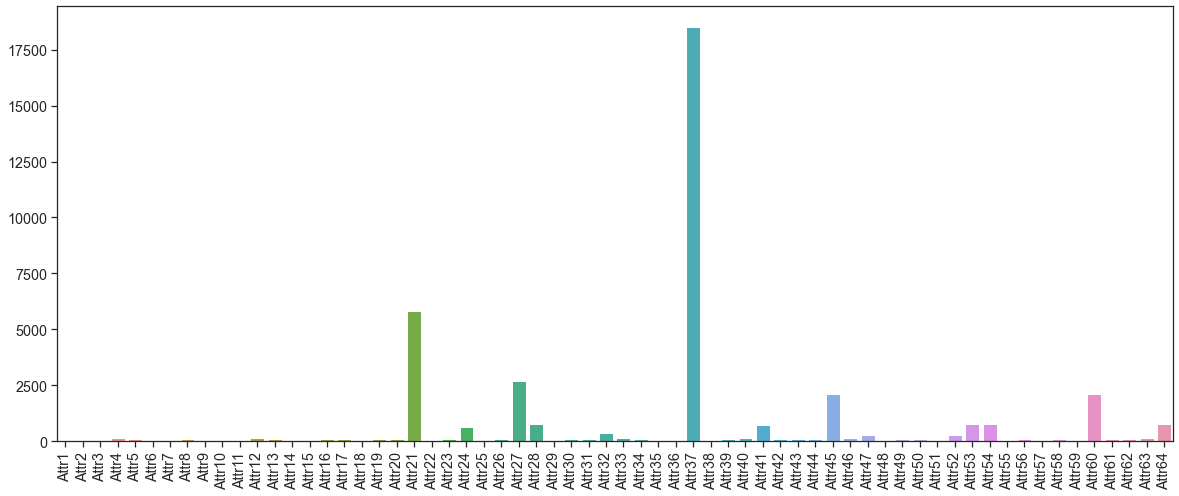

In [9]:
# helper function to visualize missing values in each column of dataset
def plot_missing_values():
    colm,val = list(),list()
    for col in data.columns:
        val_non_numeric = pd.to_numeric(data[col], errors='coerce').isna().sum()
        if val_non_numeric:
            val.append(val_non_numeric)
            colm.append(col)

    plt.figure(figsize=(20,8))    
    sns.barplot(colm,val)
    plt.xticks(rotation=90);
    pass

plot_missing_values()

In [10]:
# finding unique non numeric values in columns
for col in data.columns:
    print(col,':',data.loc[pd.to_numeric(data[col], errors='coerce').isnull(),col].unique())

Attr1 : ['?']
Attr2 : ['?']
Attr3 : ['?']
Attr4 : ['?']
Attr5 : ['?']
Attr6 : ['?']
Attr7 : ['?']
Attr8 : ['?']
Attr9 : ['?']
Attr10 : ['?']
Attr11 : ['?']
Attr12 : ['?']
Attr13 : ['?']
Attr14 : ['?']
Attr15 : ['?']
Attr16 : ['?']
Attr17 : ['?']
Attr18 : ['?']
Attr19 : ['?']
Attr20 : ['?']
Attr21 : ['?']
Attr22 : ['?']
Attr23 : ['?']
Attr24 : ['?']
Attr25 : ['?']
Attr26 : ['?']
Attr27 : ['?']
Attr28 : ['?']
Attr29 : ['?']
Attr30 : ['?']
Attr31 : ['?']
Attr32 : ['?']
Attr33 : ['?']
Attr34 : ['?']
Attr35 : ['?']
Attr36 : ['?']
Attr37 : ['?']
Attr38 : ['?']
Attr39 : ['?']
Attr40 : ['?']
Attr41 : ['?']
Attr42 : ['?']
Attr43 : ['?']
Attr44 : ['?']
Attr45 : ['?']
Attr46 : ['?']
Attr47 : ['?']
Attr48 : ['?']
Attr49 : ['?']
Attr50 : ['?']
Attr51 : ['?']
Attr52 : ['?']
Attr53 : ['?']
Attr54 : ['?']
Attr55 : ['?']
Attr56 : ['?']
Attr57 : ['?']
Attr58 : ['?']
Attr59 : ['?']
Attr60 : ['?']
Attr61 : ['?']
Attr62 : ['?']
Attr63 : ['?']
Attr64 : ['?']
class : []


In [11]:
# replacing ? with nan
data = data.replace('?',np.nan)

**Create a Test and Train Set.<br>**
Now it is time to split aside the train and test dataset. Why is it that we makes this decision at this stage? Since if we don't do it and train our model on the whole dataset and then test it on the part of the dataset, we are testing on the subset of data which was used for training and hence we will never know whether our model generalizes well or not.

To split the dataset into training and testing, we will use scikit learn's utility train_test_split. It works also with pandas dataframe and we don't have to do any conversion from pandas to numpy data type.

For Model Training, we will sub-split train set and only in the end, we will use test set for generalization test.

In [12]:
# 10 percent of dataset is used for test and 90 percent for model training

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42,stratify=y,shuffle=True)

In [13]:
# checking the skew of dataset
pd.DataFrame(X_train.skew()).T

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,-123.67009323,53.27589426,-83.3444224,145.72707051,-12.42995381,-26.3149467,19.30958997,77.07564468,122.6462144,48.84664226,54.26027422,51.53714081,111.01443393,19.30958453,15.18117512,53.54200542,76.55328009,19.1326819,151.40691647,194.61661587,105.65736795,60.57978372,154.3886714,45.90716157,57.91576785,55.11726031,73.54574447,89.44294705,-0.08159044,154.2160257,151.73481902,160.0647004,145.03704577,139.58131976,57.27286232,122.16544146,118.56751735,48.44075642,-152.69469763,94.1967457,193.05601628,35.16115788,190.57585798,187.53706952,-70.3640773,145.8452205,148.43705457,29.19622937,-177.11058714,133.93420593,83.61113044,117.34370999,110.59848122,109.47379928,37.91285218,-194.66815762,-71.46932431,193.79313828,166.53675874,127.71297005,165.08726589,141.37370807,153.73581814,87.46809031


**ML Pipeline for Data Processing:<br>**
Next, we will preprocess the data so that it is more suitable for input to the scikit learn algorithms.
we will use scikit learn transformer and pipeline to create the ML pipeline. This will allow us to use the pre-processing ml pipeline to apply to both training and test dataset.

We will implement ml pipeline for X (i.e the input feature set) and y for the output. We will use various transformer from scikit learn.
- clean and split the dataset
- reset index of dataframe.
- combine the features with target.

In [14]:
# helper function to preprocess data
def preprocess_data(X_train,X_test,y_train,y_test):
#   selecting columns names
    col_list = X_train.columns
#   pipeline for imputation of missing value and correcting skew
    pipe = make_pipeline(SimpleImputer(strategy='median'),
                         PowerTransformer(method='yeo-johnson', standardize=True, copy=True))
#   fitting on training set 
    X_train = pipe.fit_transform(X_train)
#   fitting on test set
    X_test = pipe.transform(X_test)
#   resetting index
    y_train.index = range(len(y_train))
    y_test.index = range(len(y_test))
    X_train = pd.concat([pd.DataFrame(X_train,columns=col_list),y_train],axis=1)
    X_test = pd.concat([pd.DataFrame(X_test,columns=col_list),y_test],axis=1)
    return X_train,X_test

In [15]:
X_train,X_test = preprocess_data(X_train,X_test,y_train,y_test)

**Positive and Negative Class Distribution:<br>**
We know the output i.e bankruptcy can be 'yes' or 'no'. Lets see it's relative frequencies. Since we are interested in predicting whether company is going to be bankrupt or not, our positive sample is 1 and negative samples is 0

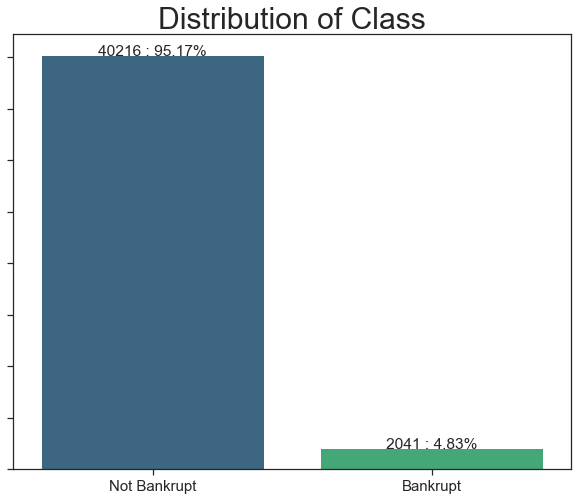

In [16]:
# checking the distribution of target class
fig, ax = plt.subplots()
val = (X_train['class'].value_counts().values/len(X_train))*100
g = sns.countplot(data['class'], palette='viridis')
g.set_xticklabels(['Not Bankrupt', 'Bankrupt'])
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs,val):
    def _show_on_single_plot(ax):        
        for p,q in zip(ax.patches,val):
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f} : {:.2f}%'.format(p.get_height(),q)
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
show_values_on_bars(ax,val)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Class', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

**Observations:<br>**
we can see that we have class imbalances between positive and negative classes (positive samples are around 5% and negative samples are around 95%). The class imbalance is very common in the real dataset. We will see that this imabalance causes problem in our model performance. However we will also explore ways to mitigate it.

In [17]:
# temp dataframe for visualization
nd = pd.melt(frame=X_train,id_vars='class')
nd

,class,variable,value
0,0,Attr1,-0.07160391
1,0,Attr1,-0.01213981
2,0,Attr1,-0.05974625
3,0,Attr1,-0.02199322
4,0,Attr1,0.04507539
...,...,...,...
2433979,0,Attr64,0.06913814
2433980,0,Attr64,-0.03900757
2433981,0,Attr64,-0.02314875
2433982,0,Attr64,-0.03732017


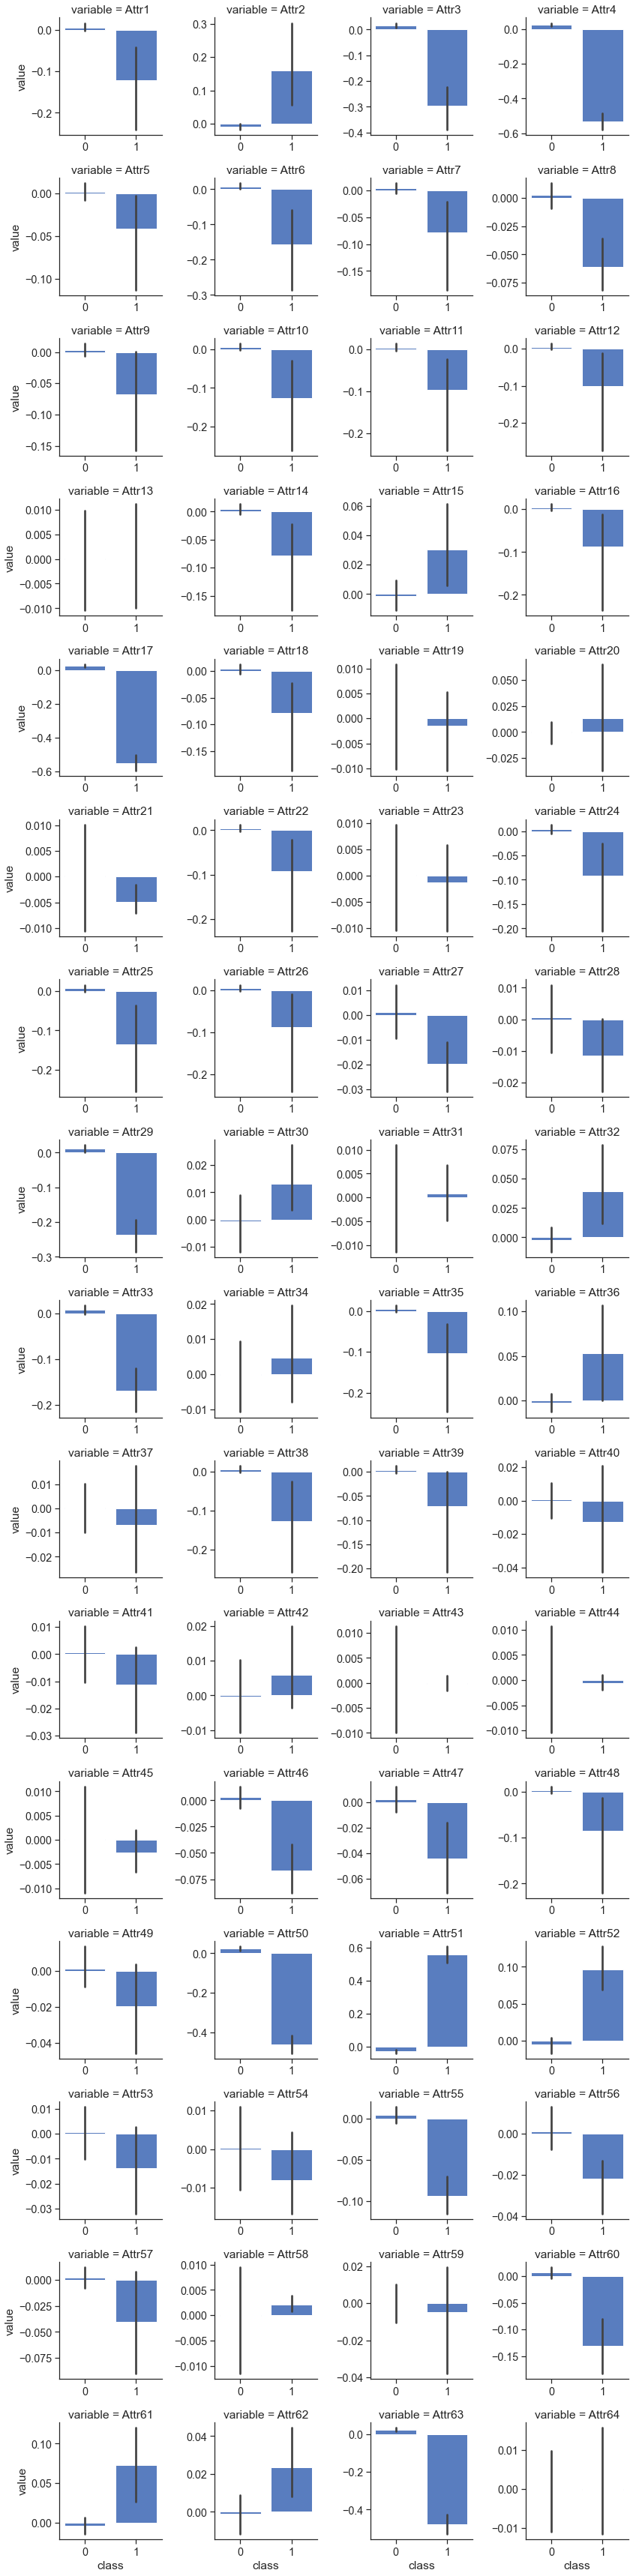

In [18]:
# visualizing how features of both class differ from each other
nd = pd.melt(frame=X_train,id_vars='class')
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.barplot, 'class','value')

**Observations:<br>**
Most of the features are negative after standardization for bankrupted companies.

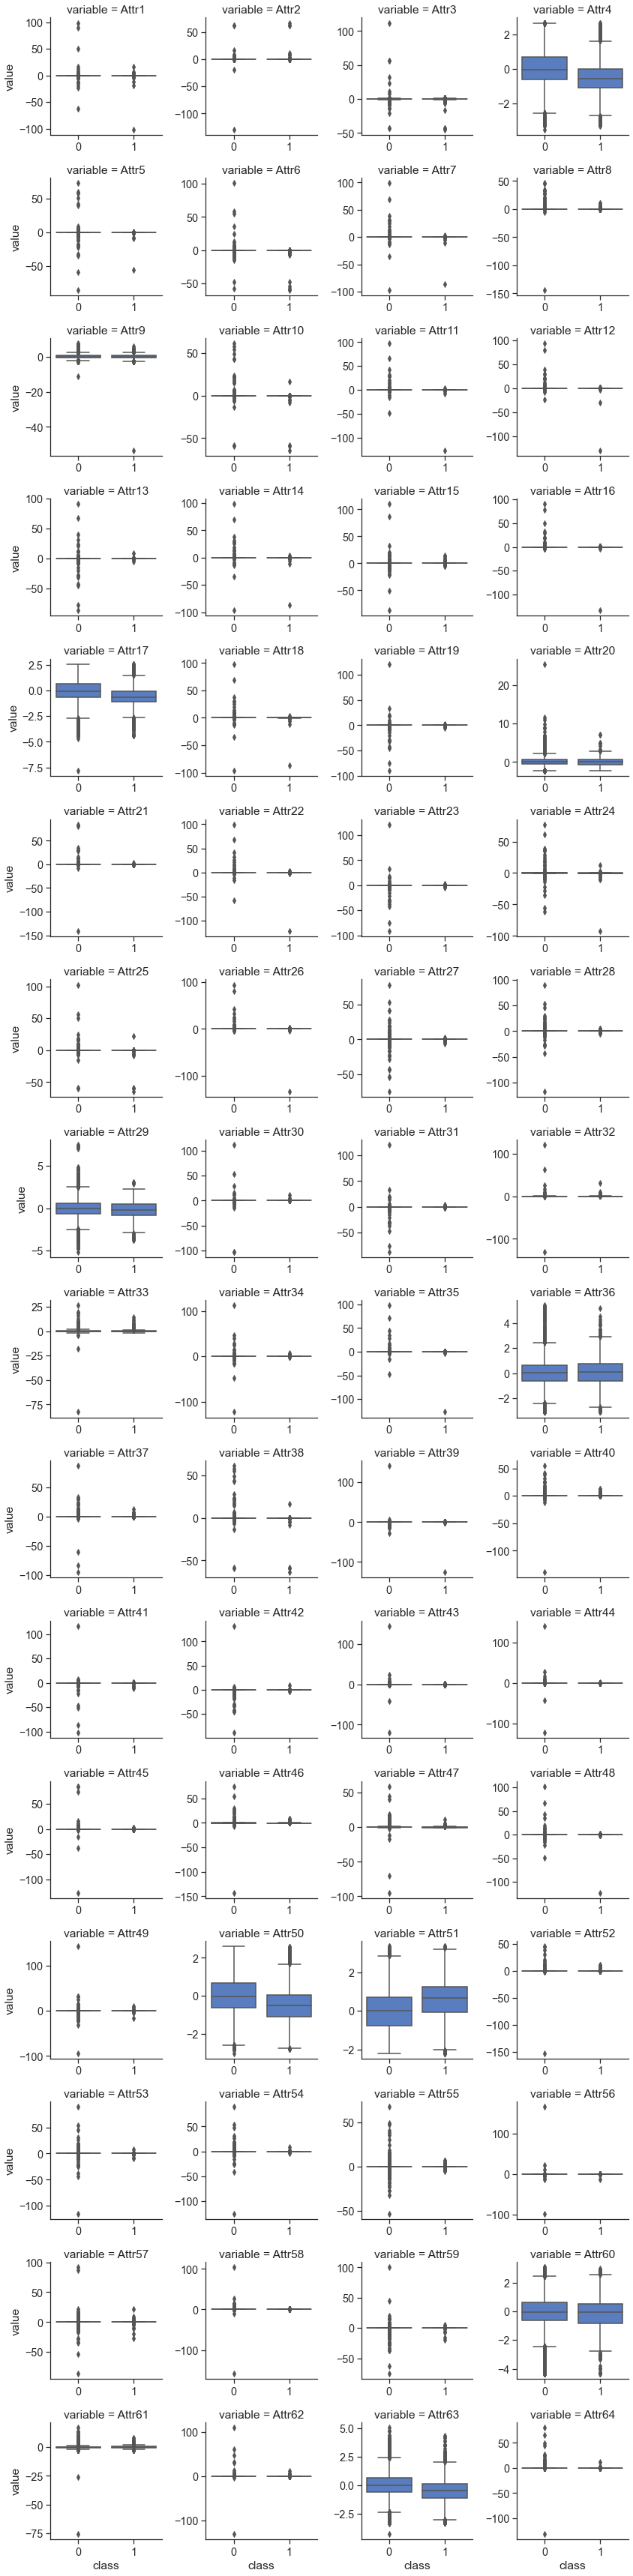

In [19]:
# let's see how many outliers are there in our dataset
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.boxplot, 'class','value')

**Observations:<br>**
Most of the features have outliers. It will take time to deal with them one by one, so let out algorithm handle the outliers.

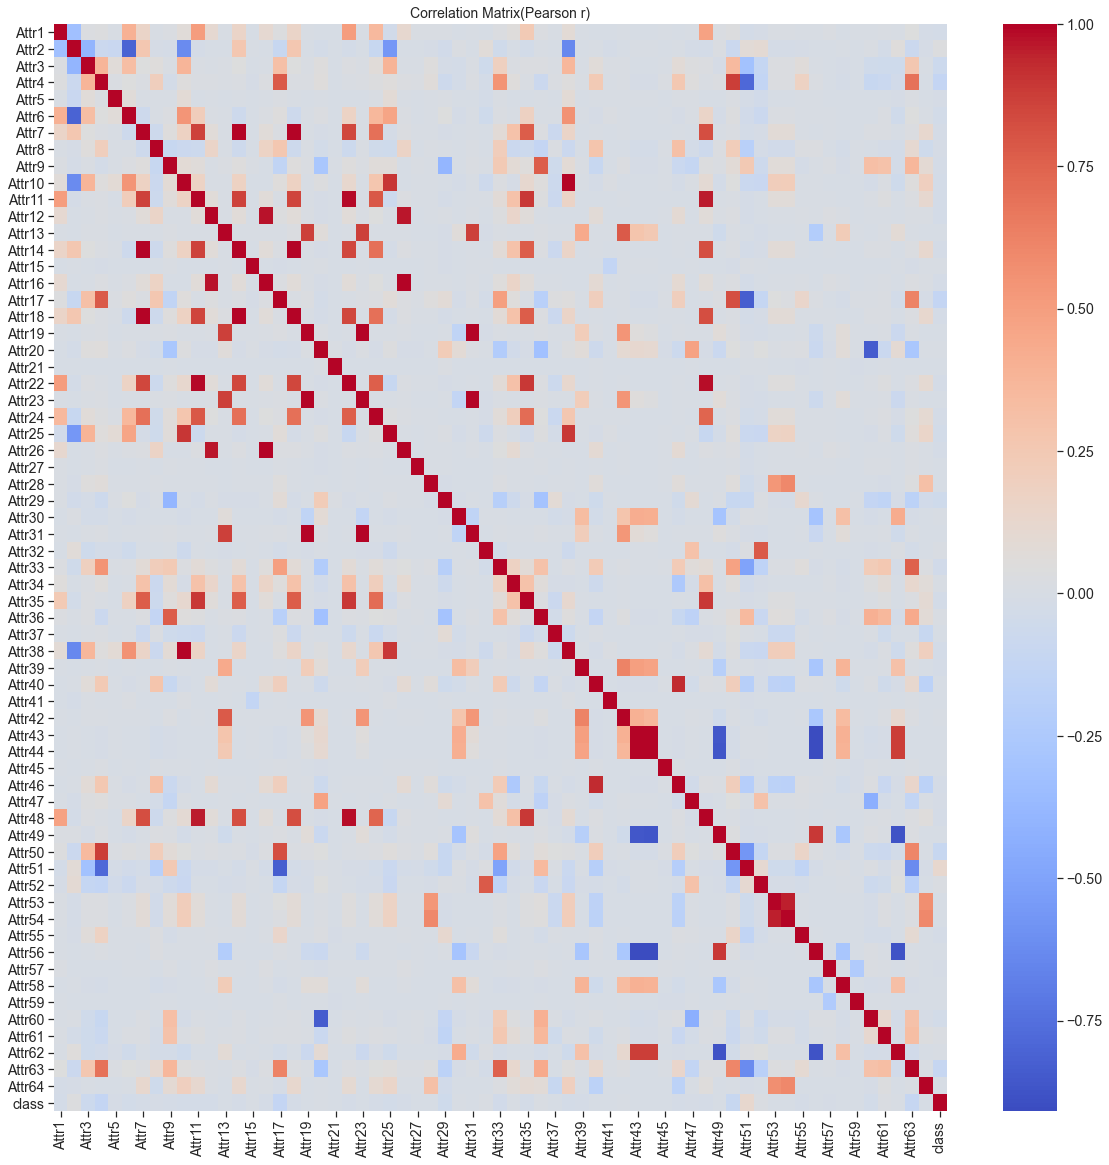

In [20]:
# let's see how features are corelated with each other
corr = X_train.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap='coolwarm',cbar=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Correlation Matrix(Pearson r)', fontsize=14)
plt.show()

**Observations:<br>**
There are some good amount of correlation among features. Needs to be handled.

In [21]:
# helper function to find correlated columns
def correlated_columns(corr_matrix):    
    ops = dict()

    upper = corr.where(np.where(np.triu(np.ones(corr.shape),k=1)==1,True,False)).copy()
    to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.9)]

    # Dataframe to hold correlated pairs
    record_collinear = pd.DataFrame(columns = ['drop_feature', 'corr_feature', 'corr_value'])

    # Iterate through the columns to drop to record pairs of correlated features
    for column in to_drop:

        # Find the correlated features
        corr_features = list(upper.index[upper[column].abs() > 0.9])

        # Find the correlated values
        corr_values = list(upper[column][upper[column].abs() > 0.9])
        drop_features = [column for _ in range(len(corr_features))]    

        # Record the information (need a temp df for now)
        temp_df = pd.DataFrame.from_dict({'drop_feature': drop_features,
                                          'corr_feature': corr_features,
                                          'corr_value': corr_values})

        # Add to dataframe
        record_collinear = record_collinear.append(temp_df, ignore_index = True)

    
    ops['collinear'] = to_drop
    return record_collinear, ops

In [22]:
record_collinear, ops = correlated_columns(corr)

In [23]:
record_collinear

,drop_feature,corr_feature,corr_value
0,Attr14,Attr7,0.99999998
1,Attr16,Attr12,0.97322114
2,Attr18,Attr7,0.99596732
3,Attr18,Attr14,0.99598533
4,Attr22,Attr11,0.98592861
5,Attr23,Attr19,0.99863783
6,Attr26,Attr12,0.96994208
7,Attr26,Attr16,0.99406235
8,Attr31,Attr19,0.99851515
9,Attr31,Attr23,0.99678754


In [24]:
# helper function to plot correlated columns from a group
def plot_collinear_features(df):
    global X_train
    gp = df.groupby(by='drop_feature')
    correlated_cols = list()
    for idx,group in gp:   
        correlated_cols.append(group['corr_feature'].unique().tolist()+group['drop_feature'].unique().tolist())
        
    correlated_cols=sorted(correlated_cols,key=len,reverse=True)
    
    for idx,(i,j) in enumerate(combinations(correlated_cols[0],2),start=1):    
        plt.subplot(5,1,idx)
        sns.regplot(X_train[i],X_train[j])
    plt.tight_layout()
    return correlated_cols

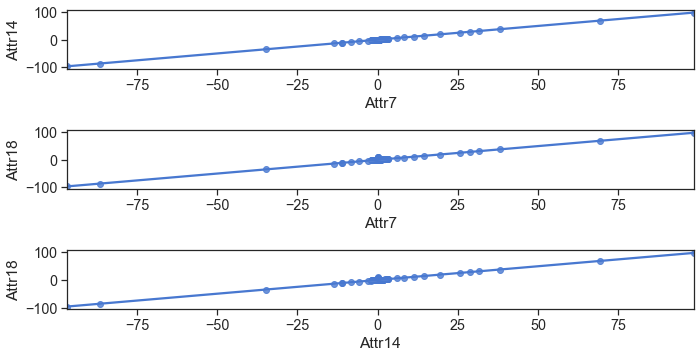

In [25]:
correlated_cols = plot_collinear_features(record_collinear)

**Observations:<br>**
Clear evidence of collinearity among features.

**Remedy:**<br>
- Create new features from correlated features.
- Drop correlated features. But directly droping them may loose some information instead we will keep the feature that has most impact on target and drop the rest from the group.

In [26]:
# importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [27]:
# selecting the features having least impact for inference from correlated group
drop_col_lst = list()
for cols in correlated_cols:
    rf_model = RandomForestClassifier(random_state=42)
    sfm = SelectFromModel(rf_model,max_features=1,prefit=False).fit(X_train[cols],X_train['class'])
    drop_col_lst.append(np.array(cols)[~sfm.get_support()])
    
drop_col_lst    

[array(['Attr7', 'Attr18'], dtype='<U6'),
 array(['Attr16', 'Attr26'], dtype='<U6'),
 array(['Attr19', 'Attr23'], dtype='<U6'),
 array(['Attr11', 'Attr48'], dtype='<U6'),
 array(['Attr43', 'Attr44'], dtype='<U6'),
 array(['Attr7'], dtype='<U6'),
 array(['Attr12'], dtype='<U6'),
 array(['Attr22'], dtype='<U6'),
 array(['Attr23'], dtype='<U6'),
 array(['Attr10'], dtype='<U6'),
 array(['Attr44'], dtype='<U6'),
 array(['Attr40'], dtype='<U6'),
 array(['Attr53'], dtype='<U6')]

In [28]:
# droping columns from dataset
for cols_to_drop in drop_col_lst:
    try:
        X_train.drop(cols_to_drop,axis=1,inplace=True)
        X_test.drop(cols_to_drop,axis=1,inplace=True)
    except KeyError as keyerr:
        print('Columns already Dropped....')
        
X_train.shape,X_test.shape        

Columns already Dropped....
Columns already Dropped....
Columns already Dropped....


((38031, 50), (4226, 50))

In [29]:
# isolating feature matrix and target vector
X = X_train.iloc[:,:-1]
y = X_train.iloc[:,-1]

In [30]:
# isolating feature matrix and target vector for test set
y_test = X_test.iloc[:,-1]
X_test = X_test.iloc[:,:-1]

In [31]:
# let's see what is the weight assigned to each class
from sklearn.utils import class_weight

target = 'Class'
class_weight.compute_class_weight('balanced', np.unique(y), y)

array([ 0.52537713, 10.35138813])

In [32]:
# train test split: 80% training and 20% testing
Xtrain,Xvalid,ytrain,yvalid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)
Xtrain.shape,Xvalid.shape,X_test.shape

((30424, 49), (7607, 49), (4226, 49))

In [33]:
# loading ml libraries
from sklearn.experimental import enable_hist_gradient_boosting,enable_iterative_imputer
from sklearn.ensemble import RandomForestClassifier,HistGradientBoostingClassifier,AdaBoostClassifier

from hyperopt import fmin,anneal,tpe,hp,Trials,STATUS_OK
from hyperopt.pyll.stochastic import sample
from sklearn.model_selection import cross_val_score,StratifiedKFold,RepeatedStratifiedKFold

from imblearn.pipeline import make_pipeline as imbl_mp
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.tree import DecisionTreeClassifier,export_graphviz,plot_tree
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier

In [34]:
# helper function to print model evaluation
def get_model_eval(y_actual,y_pred):
    
    print(f'********************')
    print(f'Precision = {metrics.precision_score(y_actual,y_pred)}')
    print(f'Recall = {metrics.recall_score(y_actual,y_pred)}')
    print(f'F1 Score = {metrics.f1_score(y_actual,y_pred)}')
    print(f'cohen_kappa_score Score = {metrics.cohen_kappa_score(y_actual,y_pred)}')
    print(f'roc-auc Score = {metrics.roc_auc_score(y_actual,y_pred)}')
    print()
    print(metrics.confusion_matrix(y_actual, y_pred))

In [35]:
# helper function to train model and print model evaluation
def build_model(model,Xtrain,Xvalid,X_test_reduced,ytrain,yvalid,y_test):        

    model.fit(Xtrain,ytrain)

    y_train_pred = model.predict(Xtrain)
    y_valid_pred = model.predict(Xvalid)
    y_test_pred = model.predict(X_test_reduced)

    print('Train:')
    get_model_eval(ytrain,y_train_pred)
    print()
    print('Valid:')
    get_model_eval(yvalid,y_valid_pred)
    print()
    print('Test:')
    get_model_eval(y_test,y_test_pred)
    pass

In [36]:
# using resampling to increase minority class
sm = SMOTE(sampling_strategy='minority',random_state=42)
X_resampled,y_resampled = sm.fit_resample(Xtrain,ytrain)

In [37]:
# helper function to find best parameters for random forest with cost sensetive learning
def rf_cv(params, Xtrain=Xtrain, ytrain=ytrain):

    kf = RepeatedStratifiedKFold(n_splits=5, random_state=42, n_repeats=3)
    X, y = Xtrain, ytrain

    params = {'n_estimators': int(params['n_estimators']),
              'max_features': int(params['max_features']),
              'max_depth': int(params['max_depth']),
              'min_samples_leaf': int(params['min_samples_leaf']),
              'min_samples_split': int(params['min_samples_split']),
              }

    model = RandomForestClassifier(bootstrap=True, random_state=42, class_weight='balanced')

    model.set_params(**params)
    score = cross_val_score(model, X, y, cv=kf, scoring="f1", n_jobs=-1).mean()
    loss = -score
    return {'loss': loss, 'status': STATUS_OK}

# helper function to find best parameters for xgboost with cost sensetive learning
def xgb_f1_cv(params, Xtrain=Xtrain, ytrain=ytrain):

    random_state = 42
    num_folds = 5
    kf = RepeatedStratifiedKFold(n_splits=num_folds, random_state=random_state, n_repeats=3)
    X, y = Xtrain, ytrain
    params = {'n_estimators': int(params['n_estimators']),
              'learning_rate': params['learning_rate'],
              'max_depth': int(params['max_depth']),
              'min_child_weight': int(params['min_child_weight']),
              'subsample': params['subsample'],
              'gamma': params['gamma'],
              'colsample_bytree': params['colsample_bytree'],
              'objective': params['objective'],
              'reg_lambda': params['reg_lambda'],
              'reg_alpha': params['reg_alpha'],
              'max_bin': int(params['max_bin']),
              'scale_pos_weight': params['scale_pos_weight'],
              'max_delta_step': int(params['max_delta_step'])}
    
    model = XGBClassifier(random_state=random_state, eval_metric='auc', **params)
    score = cross_val_score(model, X, y, cv=kf, scoring="roc_auc", n_jobs=-1).mean()
    loss = 1-score
    return {'loss': loss, 'status': STATUS_OK}

# helper function to find best parameters for hist gradient boostingc lassifier with smote
def hgb_cv(params, Xtrain=Xtrain, ytrain=ytrain):

    kf = RepeatedStratifiedKFold(n_splits=5, random_state=42, n_repeats=3)
    X, y = Xtrain, ytrain

    params = {'histgradientboostingclassifier__max_iter': int(params['histgradientboostingclassifier__max_iter']),
              'histgradientboostingclassifier__max_depth': int(params['histgradientboostingclassifier__max_depth']),
              'histgradientboostingclassifier__max_bins': int(params['histgradientboostingclassifier__max_bins'])
              }

    model = imbl_mp(SMOTE(sampling_strategy='minority', random_state=42),
                    HistGradientBoostingClassifier(loss='binary_crossentropy', random_state=42, scoring='f1'))

    model.set_params(**params)
    score = cross_val_score(model, X, y, cv=kf, scoring="f1", n_jobs=-1).mean()
    loss = -score

    return {'loss': loss, 'status': STATUS_OK}

# helper function to find best parameters for Balanced Bagging Classifier
def bbc_cv(params, Xtrain=Xtrain, ytrain=ytrain):

    kf = RepeatedStratifiedKFold(n_splits=5, random_state=42, n_repeats=3)
    X, y = Xtrain, ytrain

    params = {'n_estimators': int(params['n_estimators']),
              'max_features': int(params['max_features'])
              }

    model = BalancedBaggingClassifier(
        bootstrap=True, random_state=42, bootstrap_features=True, replacement=True)

    model.set_params(**params)
    score = cross_val_score(model, X, y, cv=kf, scoring="f1", n_jobs=-1).mean()
    loss = -score
    return {'loss': loss, 'status': STATUS_OK}

# helper function to explore parameter space
def find_best_params(n_iter, model_type):

    if model_type == 'rf':
        space = {'n_estimators': hp.quniform('n_estimators', 100, 700, 10),
                 'max_features':  hp.quniform('max_features', 2, 40, 2),
                 'max_depth':  hp.quniform('max_depth', 2, 14, 2),
                 'min_samples_split': hp.quniform('min_samples_split', 1000, 5000, 100),
                 'min_samples_leaf': hp.quniform('min_samples_leaf', 500, 2000, 100),
                 'max_samples': hp.loguniform('max_samples', np.log(0.4), np.log(0.99))}
        func_ = rf_cv
    elif model_type == 'xgb':
        space = {'n_estimators': hp.quniform('n_estimators', 100, 2000, 100),
                 'learning_rate': hp.loguniform('learning_rate', np.log(0.025), np.log(0.5)),
                 'max_depth':  hp.quniform('max_depth', 2, 16, 2),
                 'min_child_weight': hp.quniform('min_child_weight', 1, 50, 1),  # 18 1, 28, 0.5
                 'subsample': hp.loguniform('subsample', np.log(0.5), np.log(0.99)),
                 'gamma': hp.loguniform('gamma', np.log(0.01), np.log(0.99)),
                 'colsample_bytree': hp.loguniform('colsample_bytree', np.log(0.5), np.log(0.99)),
                 'objective': 'binary:logistic',
                 'reg_lambda': hp.loguniform('reg_lambda', np.log(0.01), np.log(5)),
                 'reg_alpha': hp.loguniform('reg_alpha', np.log(0.01), np.log(5)),
                 'max_bin': hp.quniform('max_bin', 2, 255, 1),
                 'scale_pos_weight': hp.uniform('scale_pos_weight', 4, 20),  # 11,112
                 'max_delta_step': hp.quniform('max_delta_step', 1, 100, 1)}
        func_ = xgb_f1_cv
    elif model_type == 'hgb':
        space = {'histgradientboostingclassifier__max_iter': hp.quniform('histgradientboostingclassifier__max_iter', 100, 2000, 100),
                 'histgradientboostingclassifier__learning_rate': hp.loguniform('histgradientboostingclassifier__learning_rate', np.log(0.025), np.log(0.5)),
                 'histgradientboostingclassifier__max_depth':  hp.quniform('histgradientboostingclassifier__max_depth', 2, 16, 2),
                 'histgradientboostingclassifier__l2_regularization': hp.loguniform('histgradientboostingclassifier__l2_regularization', np.log(0.01), np.log(5)),
                 'histgradientboostingclassifier__max_bins': hp.quniform('histgradientboostingclassifier__max_bins', 2, 255, 1)}
        func_ = hgb_cv
    elif model_type == 'bbc':
        space = {'n_estimators': hp.quniform('n_estimators', 100, 700, 10),
                 'max_samples': hp.loguniform('max_samples', np.log(0.4), np.log(0.99)),
                 'max_features':  hp.quniform('max_features', 2, 40, 2)}
        func_ = bbc_cv

    trials = Trials()
    best = fmin(fn=func_,  # function to optimize
                space=space,
                algo=tpe.suggest,  # optimization algorithm, hyperotp will select its parameters automatically
                max_evals=n_iter,  # maximum number of iterations
                trials=trials,  # logging
                rstate=np.random.RandomState(42)  # fixing random state for the reproducibility
                )
    return best


In [ ]:
# Model Training 
We have transformed and preprocessed our dataset using ML pipelines and are ready to build the model.

# RandomForest with Cost-Sensitive Learning

In [ ]:
# finding best parameters for random forest
best = find_best_params(30,'rf')
best

In [39]:
# best found parameters using hyperopt
best = {'max_depth': 8.0,
        'max_features': 40.0,
        'max_samples': 0.964358960700838,
        'min_samples_leaf': 500.0,
        'min_samples_split': 1100.0,
        'n_estimators': 280.0} 

# converting float to int
best['max_depth'] = int(best['max_depth'])
best['max_features'] = int(best['max_features'])
best['min_samples_leaf'] = int(best['min_samples_leaf'])
best['min_samples_split'] = int(best['min_samples_split'])
best['n_estimators'] = int(best['n_estimators'])

# defining and fitting model
rf_clf = RandomForestClassifier(bootstrap=True,random_state=42,**best)          
        
build_model(rf_clf,X_resampled,Xvalid,X_test,y_resampled,yvalid,y_test)


Train:
********************
Precision = 0.829331450094162
Recall = 0.8517303308696553
F1 Score = 0.8403816663826887
cohen_kappa_score Score = 0.6764523036540719
roc-auc Score = 0.838226151827036

[[23879  5075]
 [ 4293 24661]]

Valid:
********************
Precision = 0.19081967213114753
Recall = 0.7929155313351499
F1 Score = 0.30761099365750527
cohen_kappa_score Score = 0.24922026469487824
roc-auc Score = 0.8112367711924369

[[6006 1234]
 [  76  291]]

Test:
********************
Precision = 0.185761957730812
Recall = 0.8186274509803921
F1 Score = 0.30281051677243875
cohen_kappa_score Score = 0.24326357100710072
roc-auc Score = 0.8183142227552384

[[3290  732]
 [  37  167]]


# XGBoost with Cost-Sensitive Learning

In [ ]:
# finding best parameters for xgboost
best = find_best_params(30,'xgb')
best

In [40]:
# best found parameters using hyperopt
best = { 'colsample_bytree': 0.8860047619139215,
         'gamma': 0.04805078479913195,
         'learning_rate': 0.0796475185259323,
         'max_bin': 233.0,
         'max_delta_step': 87.0,
         'max_depth': 12.0,
         'min_child_weight': 6.0,
         'n_estimators': 1100.0,
         'reg_alpha': 1.4677026044051644,
         'reg_lambda': 0.4112549358764082,
         'scale_pos_weight': 6.749944982344971,
         'subsample': 0.8709227090332377}

# converting float to int
best['n_estimators'] = int(best['n_estimators'])
best['max_depth'] = int(best['max_depth'])
best['min_child_weight'] = int(best['min_child_weight'])
best['max_bin'] = int(best['max_bin'])
best['scale_pos_weight'] = int(best['scale_pos_weight'])
best['max_delta_step'] = int(best['max_delta_step'])


# defining and fitting model
xgb_clf = XGBClassifier(random_state=42,eval_metric='auc', **best)     
        
build_model(xgb_clf,Xtrain,Xvalid,X_test,ytrain,yvalid,y_test)

Train:
********************
Precision = 1.0
Recall = 1.0
F1 Score = 1.0
cohen_kappa_score Score = 1.0
roc-auc Score = 1.0

[[28954     0]
 [    0  1470]]

Valid:
********************
Precision = 0.8972332015810277
Recall = 0.6185286103542235
F1 Score = 0.7322580645161291
cohen_kappa_score Score = 0.721283845674715
roc-auc Score = 0.8074687250666146

[[7214   26]
 [ 140  227]]

Test:
********************
Precision = 0.8680555555555556
Recall = 0.6127450980392157
F1 Score = 0.7183908045977012
cohen_kappa_score Score = 0.7066724461291767
roc-auc Score = 0.8040105400688371

[[4003   19]
 [  79  125]]


# HistGradientBoosting with SMOTE

In [ ]:
# finding best parameters for HistGradientBoosting
best = find_best_params(10,Xtrain,ytrain)
best

In [41]:
# best found parameters using hyperopt
best = { 'l2_regularization': 2.7508672444692723,
         'learning_rate': 0.2133557889337064,
         'max_bins': 135.0,
         'max_depth': 8.0,
         'max_iter': 1600.0}


best['max_iter'] = int(best['max_iter'])
best['max_depth'] = int(best['max_depth'])
best['max_bins'] = int(best['max_bins'])

# defining and fitting model
hgb_clf1 = HistGradientBoostingClassifier(loss='binary_crossentropy',random_state=42,scoring='f1',
                                          early_stopping=True,validation_fraction=0.2,n_iter_no_change=18,verbose=3,
                                          **best)        
        
build_model(hgb_clf1,X_resampled,Xvalid,X_test,y_resampled,yvalid,y_test)

Binning 0.018 GB of training data: 0.543 s
Binning 0.005 GB of validation data: 0.027 s
Fitting gradient boosted rounds:
[1/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.81331, val score: 0.81382, in 0.128s
[2/1600] 1 tree, 31 leaves, max depth = 7, train score: 0.82774, val score: 0.82857, in 0.068s
[3/1600] 1 tree, 31 leaves, max depth = 7, train score: 0.84259, val score: 0.84496, in 0.070s
[4/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.85280, val score: 0.85877, in 0.067s
[5/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.86013, val score: 0.86431, in 0.068s
[6/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.86833, val score: 0.86832, in 0.072s
[7/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.87479, val score: 0.87505, in 0.071s
[8/1600] 1 tree, 31 leaves, max depth = 7, train score: 0.87914, val score: 0.87933, in 0.074s
[9/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.88564, val score: 0.88364, in 0.078s
[10/1600] 1 tree, 31 lea

[86/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.98241, val score: 0.97283, in 0.218s
[87/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.98291, val score: 0.97266, in 0.184s
[88/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.98291, val score: 0.97276, in 0.178s
[89/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.98361, val score: 0.97335, in 0.171s
[90/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.98459, val score: 0.97342, in 0.188s
[91/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.98508, val score: 0.97358, in 0.176s
[92/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.98518, val score: 0.97367, in 0.180s
[93/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.98548, val score: 0.97343, in 0.182s
[94/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.98558, val score: 0.97394, in 0.178s
[95/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.98588, val score: 0.97402, in 0.246s
[96/1600] 1 tree, 31 leaves, max depth =

[171/1600] 1 tree, 31 leaves, max depth = 7, train score: 0.99800, val score: 0.98509, in 0.308s
[172/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.99810, val score: 0.98543, in 0.294s
[173/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.99810, val score: 0.98543, in 0.285s
[174/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.99830, val score: 0.98560, in 0.330s
[175/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.99820, val score: 0.98551, in 0.371s
[176/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.99820, val score: 0.98560, in 0.281s
[177/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.99820, val score: 0.98595, in 0.288s
[178/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.99820, val score: 0.98595, in 0.287s
[179/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.99820, val score: 0.98612, in 0.298s
[180/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.99820, val score: 0.98603, in 0.302s
[181/1600] 1 tree, 31 leaves, 

[256/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.99980, val score: 0.98843, in 0.380s
[257/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.99980, val score: 0.98834, in 0.374s
[258/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.99980, val score: 0.98843, in 0.381s
[259/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.99980, val score: 0.98851, in 0.376s
[260/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.99970, val score: 0.98860, in 0.381s
[261/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.99970, val score: 0.98868, in 0.389s
[262/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.99970, val score: 0.98877, in 0.441s
[263/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.99970, val score: 0.98860, in 0.386s
[264/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.99970, val score: 0.98868, in 0.397s
[265/1600] 1 tree, 31 leaves, max depth = 8, train score: 0.99970, val score: 0.98859, in 0.393s
[266/1600] 1 tree, 31 leaves, 

# BalancedBaggingClassifier

In [42]:
# loading libraries
from imblearn.ensemble import BalancedBaggingClassifier,EasyEnsembleClassifier,BalancedRandomForestClassifier,RUSBoostClassifier

In [ ]:
# finding best parameters for BalancedBaggingClassifier
best_param_bbc = find_best_params(15,'bbc')
best_param_bbc

In [43]:
# best found parameters using hyperopt
best_param_bbc = {'max_features': 38,
                 'max_samples': 0.5284320931281874,
                 'n_estimators': 630}

# defining and fitting model
clf = BalancedBaggingClassifier(bootstrap=True,random_state=42,bootstrap_features=True,replacement=True,**best_param_bbc)        
        
build_model(clf,Xtrain,Xvalid,X_test,ytrain,yvalid,y_test)

Train:
********************
Precision = 0.28743104806934594
Recall = 0.992517006802721
F1 Score = 0.4457684081882065
cohen_kappa_score Score = 0.40087371544618855
roc-auc Score = 0.9337973581364576

[[25337  3617]
 [   11  1459]]

Valid:
********************
Precision = 0.2458366375892149
Recall = 0.8446866485013624
F1 Score = 0.3808353808353808
cohen_kappa_score Score = 0.3308221529604519
roc-auc Score = 0.8566665286705707

[[6289  951]
 [  57  310]]

Test:
********************
Precision = 0.24339360222531292
Recall = 0.8578431372549019
F1 Score = 0.3791982665222101
cohen_kappa_score Score = 0.32871281858792
roc-auc Score = 0.8612935228790671

[[3478  544]
 [  29  175]]


___

# Final Test Summary of all 4 models used:

**RandomForest:<br>**
- Precision = 0.185761957730812
- Recall = 0.8186274509803921
- F1 Score = 0.30281051677243875
- cohen_kappa_score Score = 0.24326357100710072
- roc-auc Score = 0.8183142227552384
- confusion matrix<br> 
[[3290  732]<br>
 [  37  167]]

**XGBoost:<br>**
- Precision = 0.8680555555555556
- Recall = 0.6127450980392157
- F1 Score = 0.7183908045977012
- cohen_kappa_score Score = 0.7066724461291767
- roc-auc Score = 0.8040105400688371
- confusion matrix<br>
[[4003   19]<br>
 [  79  125]

**HistGradientBoosting:<br>**
- Precision = 0.735
- Recall = 0.7205882352941176
- F1 Score = 0.7277227722772278
- cohen_kappa_score Score = 0.7140561873502187
- roc-auc Score = 0.8537053558370141
- confusion matrix<br>
[[3969   53]<br>
 [  57  147]

**BalancedBaggingClassifier:<br>**
- Precision = 0.24339360222531292
- Recall = 0.8578431372549019
- F1 Score = 0.3791982665222101
- cohen_kappa_score Score = 0.32871281858792
- roc-auc Score = 0.8612935228790671
- confusion matrix<br>
  [[3478  544]<br>
   [  29  175]]
   
**Conclusion:<br>**
Based on the above metrics I would go with BalancedBaggingClassifier because it has high recall. Having high recall is good in this case, reason is quite obvious it's good to red flag some companies those are at the verge of bankruptcy so that they can take measures from getting bankrupted. Also if someone is investing money in these companies they also may take action to recover their investments in time.